# non-parametric Test for Equality of Dispersion
## Median Absolute Deviation (MAD) & Squared-Rank Test
### Variability of Snowheight due to Temperature - Version 1.0
---
data: monthly mean from 1975 - 2015

---

# The Problem
A scientist decides to investigate if temperature change influences snow heights in the southern Austrian mountain range Karawanken. The scientiest knows, that the temperature has risen about  0.029 °C per year in the area where the snowfall is detected.

To investigate this question, the scientist collects the mean monthly snow heights from 1970 to 2015 and splits them into periods of 15 years, first 15 and last 15 years. The first 15 years is denoted as Period 1(P1) and the last 15 years is denoted as Period 2(P2). 

He formulates the following hypothesis:

* $H_0$ : Temperature **does not** influences the mean February snow heights $\rightarrow p_X = p_Y$
* $H_A$ : Temperature **does** influences the mean February snow heights $\rightarrow p_X \neq p_Y $

Since he is aware of the fact, that daily snow heights are not normally distributed, he correctly chooses a non-parametric hypothesis test. Namely, a rank based one. 

Invoking the Central Limit Theorem, one can reformulate the hypothesis:

* $H_0$ : Temperature **does not** influences the mean February snow heights $\rightarrow \hat{\mu}_X = \hat{\mu}_Y$ and $\hat{\sigma}_X = \hat{\sigma}_Y \rightarrow$ data is **exchangeable** 

Now, the scientest decides to perform a **test for equality of dispersion** to check, if the temperatur influences the variability of the February snow heights. Thus, he can further rewrite the hypothesis:

* $H_0$ : The variability of snow height **does not** vary between Period 1 ad Period 2 $\rightarrow \sigma_x = \sigma_y \rightarrow$ data is **exchangeable** 
* $H_A$ : The variability of snow height **does** vary between Period 1 ad Period 2  $\rightarrow \sigma_x \neq \sigma_y \rightarrow$ data is **not exchangeable** 

To investigate this question, the scientist,
* 1.) collects the mean monthly snow heights from 1970 to 2015 and splits them into periods of 15 years
* 2.) calculates the absolute deviation – that is, the absolute difference between the value and the median value – for each season seperately
* 3.) pooles both data sets together and ranks them
* 4.) seperates them afterwards again, but with their assigned ranks
* 5.) squares the ranked values and sums them up to get the sum of the squared ranks for each data set

If the variability of snow height **does not** vary between Period 1 and Period 2, hence, the data is **exchangeable**, then the scientist can invoke the **Central Limit Theorem**.
Hence, the scientist,
* 6.) calculates the mean of the sum squared ranks for one of the data sets
* 7.) calculates the variance of the sum squared ranks for the same data set
* 8.) calcualtes the continuity correnction for this data set
* 9.) finally calculates the standardized variable $z$ and compares it with a suitable threshold $z_{\alpha/2}$

The scientist will decied as followed:
* Reject $H_0$ if $|z| > z_{\alpha/2}$    
* Accept $H_0$ if $|z| < z_{\alpha/2}$  

---

# The implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import norm

### 1.) One collects the mean monthly snow heights from 1970 to 2015 and splits them into periods of 15 years
To do so, he firstly collects the snow heights from 1970 to 2015

In [3]:
# define file path
filename1 = '/home/martin/uni/10_Semester/analys_methods_in_climate_science/project/non_parametric_statistics/InitialData/SHBodental.csv'


# define period
start_date = '1970-01-01'
end_date = '2015-01-01'


# read csv and store it in pd dataframe 
df_1 = pd.read_csv(filename1, sep='\s+', header=1, names = ('Date','Time', 'delim', 'Height'), encoding = "ISO-8859-1")


# make sure that numbers are float not object type
df_1 = df_1.rename(columns={'Height': 'data_1'})
df_1['data_1'] = pd.to_numeric(df_1['data_1'].str.replace(',', '.'))
df_1['Date'] = pd.to_datetime(df_1['Date'], format='%d.%m.%Y')
df_1.set_index('Date', inplace=True)


# filter after predefined period
df_filtered = df_1[start_date : end_date]
df_filtered = df_filtered[["data_1"]]
df_filtered.head(10)

data_1
Date              
1970-01-01    60.0
1970-01-02    60.0
1970-01-03    60.0
1970-01-04    56.0
1970-01-05    52.0
1970-01-06    34.0
1970-01-07    35.0
1970-01-08    37.0
1970-01-09    36.0
1970-01-10    35.0

Secondly, he averages the daily values to acquire the montly mean snowheight

In [4]:
# resample to monthly frequency
df_monthly = df_filtered.resample('M').mean()
df_monthly.head(10)

data_1
Date                  
1970-01-31   32.612903
1970-02-28   52.464286
1970-03-31  122.387097
1970-04-30   86.766667
1970-05-31    6.806516
1970-06-30    0.000000
1970-07-31    0.000000
1970-08-31    0.000000
1970-09-30    0.000000
1970-10-31    9.129032

And finally, selects the month of interest.
> In addition, he visualizes the data to get a deeper understanding of it

In [5]:
#select the month you want to investigate
df_month_mean = df_monthly.loc[df_monthly.index.month == 2] # 1 = January... 12 = December
# calculate the mean of each Month
df_month_mean = df_month_mean.groupby(df_month_mean.index.year).mean()

df_month_mean.head(10)

plt.figure(figsize=(10, 5)) #plot data
df_month_mean.plot(kind='line', color='blue',marker='o')
plt.xlabel('Year')
plt.ylabel('Snow Height [cm]')
plt.title('Monthly Mean Snow Height')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

**Visually, one could already roughly assume from this plot that average snow heights have decreased.** Not always valid 

Next, the scientist devides the time series into two periods of 15 years

In [6]:
# create boolean indexing conditions for each decade
period_1 = (df_month_mean.index >= 1970) & (df_month_mean.index <= 1984)
period_2 = (df_month_mean.index >= 2000) & (df_month_mean.index <= 2014)

# create new data frames for each decade
df_period1 = df_month_mean.loc[period_1]
df_period2 = df_month_mean.loc[period_2]


print(df_period1)
print(df_period2)

         data_1
Date           
1970  52.464286
1971  62.928571
1972  83.000000
1973  86.464286
1974  12.750000
1975  21.107143
1976  62.000000
1977  63.642857
1978  95.071429
1979  65.821429
1980  62.482759
1981  93.428571
1982  36.178571
1983  58.535714
1984  76.241379
         data_1
Date           
2000  37.413793
2001   4.035714
2002   0.000000
2003  40.892857
2004  69.758621
2005  11.892857
2006  92.285714
2007  15.142857
2008   3.344828
2009  94.964286
2010  58.428571
2011  13.428571
2012  46.137931
2013  85.678571
2014  70.642857


He creates a combined data frame:

In [7]:
# set new index and rename columns
df_period1 = df_period1.reset_index()
df_period1['Date'] = df_period1.index + 1
df_period1 = df_period1.set_index('Date')
df_period2 = df_period2.reset_index()
df_period2['Date'] = df_period2.index + 1
df_period2 = df_period2.set_index('Date')

# merge both df in one frame and set date as index
df_merged = pd.merge(df_period1, df_period2, on=['Date'])

# Rename the columns
df = df_merged.rename(columns={'data_1_x': 'Period_1', 'data_1_y': 'Period_2'})

print(df)

       Period_1   Period_2
Date                      
1     52.464286  37.413793
2     62.928571   4.035714
3     83.000000   0.000000
4     86.464286  40.892857
5     12.750000  69.758621
6     21.107143  11.892857
7     62.000000  92.285714
8     63.642857  15.142857
9     95.071429   3.344828
10    65.821429  94.964286
11    62.482759  58.428571
12    93.428571  13.428571
13    36.178571  46.137931
14    58.535714  85.678571
15    76.241379  70.642857


---

### 2.) One calculates the deviation – that is, the difference between the value and the median value – for each period seperately.
To do so, one has to calculate the corresponding medians first:
> Its always a good advise to visualize the data

Median of Period_1: 62.92857142857143
Median of Period_2: 40.892857142857146


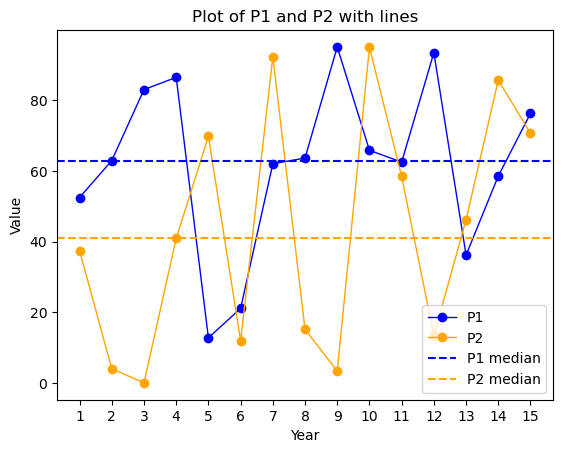

In [8]:
# Calculate the median for each variable
p1_median = df['Period_1'].median()
p2_median = df['Period_2'].median()
print("Median of Period_1:", p1_median)
print("Median of Period_2:", p2_median)

# Create a scatter plot of the data with lines
plt.plot(df.index, df['Period_1'], label='P1', color='blue',marker='o', linestyle='-', linewidth=1)
plt.plot(df.index, df['Period_2'], label='P2', color='orange', marker='o', linestyle='-', linewidth=1)

# Add horizontal lines for medians
plt.axhline(p1_median, color='blue', linestyle='--', label='P1 median')
plt.axhline(p2_median, color='orange', linestyle='--', label='P2 median')

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Plot of P1 and P2 with lines')

# Set the x-ticks to only show the year values
plt.xticks(df.index)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Now one can subtract the corresponding median from each data set to acquire the deviation:

In [9]:
# Create a new dataframe with deviations from respective medians
dev_df = pd.DataFrame({'Period_1': df['Period_1'] - p1_median, 'Period_2': df['Period_2'] - p2_median})

# Print the dataframe
print('Deviations from respective medians:\n')
print(dev_df)
print('\nWith the corresponding medians:\n')
print(dev_df.median())

Deviations from respective medians:

       Period_1   Period_2
Date                      
1    -10.464286  -3.479064
2      0.000000 -36.857143
3     20.071429 -40.892857
4     23.535714   0.000000
5    -50.178571  28.865764
6    -41.821429 -29.000000
7     -0.928571  51.392857
8      0.714286 -25.750000
9     32.142857 -37.548030
10     2.892857  54.071429
11    -0.445813  17.535714
12    30.500000 -27.464286
13   -26.750000   5.245074
14    -4.392857  44.785714
15    13.312808  29.750000

With the corresponding medians:

Period_1    0.0
Period_2    0.0
dtype: float64


Next, form the absolute value to get the absolute deviation:

In [10]:
# Create a new dataframe with the absolute values of the deviations from respective medians
dev_absolute_df = np.abs(dev_df)
print('Absolute values of the deviations from respective medians:\n')
print(dev_absolute_df)
print('\nWith the corresponding medians:\n')
print(dev_absolute_df.median())

Absolute values of the deviations from respective medians:

       Period_1   Period_2
Date                      
1     10.464286   3.479064
2      0.000000  36.857143
3     20.071429  40.892857
4     23.535714   0.000000
5     50.178571  28.865764
6     41.821429  29.000000
7      0.928571  51.392857
8      0.714286  25.750000
9     32.142857  37.548030
10     2.892857  54.071429
11     0.445813  17.535714
12    30.500000  27.464286
13    26.750000   5.245074
14     4.392857  44.785714
15    13.312808  29.750000

With the corresponding medians:

Period_1    13.312808
Period_2    29.000000
dtype: float64


Once again, we have calculated the medians of the constructed data set. Since, the data set are the absolute deviations from the mean, one can identify those as the MAD value:
$MAD[X] = median \biggl[ \underbrace{\bigl| X - median[X] \bigr| }_{\Delta X}\biggr]$

If we just apply this formula, one can see that it ends up with the same result: 

In [11]:
# Calculate the MAD for each variable
p1_mad = np.median(np.abs(df['Period_1'] - p1_median))
p2_mad = np.median(np.abs(df['Period_2'] - p2_median))
print("MAD of Period_1:", round(p1_mad,2))
print("MAD of Period_2:", round(p2_mad,2))


MAD of Period_1: 13.31
MAD of Period_2: 29.0


But what does tha MAD value tell us?

Well, it is a robust measure of variability or dispersion of a set of data.

MAD is similar to the standard deviation, but it is less sensitive to outliers and skewed data. This makes it a useful measure of variability in data sets that contain extreme values or are not normally distributed.

But what does us the difference in the MAD values tell us?

Since we have two different MAD values, the variability or dispersion of one data differs from the other. Specifically, the set with the higher MAD value has more variability or dispersion than the set with the lower MAD value.

> Again, visualization often helps to gain a better understanding

MAD of Period_1: 13.31
MAD of Period_2: 29.0


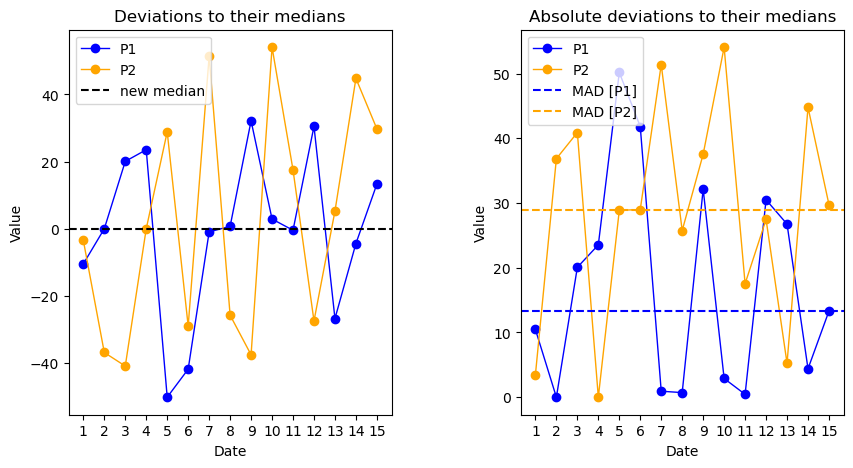

In [12]:
print("MAD of Period_1:", round(p1_mad,2))
print("MAD of Period_2:", round(p2_mad,2))

# create subplot with 2 horizontally aligned plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


# plot the first subplot on ax1
# Create a scatter plot of the deviation data with lines
ax1.plot(df.index, dev_df['Period_1'], label='P1', color='blue',marker='o', linestyle='-', linewidth=1)
ax1.plot(df.index, dev_df['Period_2'], label='P2', color='orange', marker='o', linestyle='-', linewidth=1)

# Add horizontal lines for medians
ax1.axhline(dev_df['Period_1'].median(), color='black', linestyle='--', label='new median')

# Add axis labels and a title
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.set_title('Deviations to their medians')

# Set the x-ticks to only show the year values
ax1.set_xticks(df.index)

# Add a legend
ax1.legend()


# plot the second subplot on ax2
# Create a scatter plot of the absolute deviation data with lines
ax2.plot(df.index, dev_absolute_df['Period_1'], label='P1', color='blue',marker='o', linestyle='-', linewidth=1)
ax2.plot(df.index, dev_absolute_df['Period_2'], label='P2', color='orange', marker='o', linestyle='-', linewidth=1)

# Add horizontal lines for medians
ax2.axhline(dev_absolute_df['Period_1'].median(), color='blue', linestyle='--', label='MAD [P1]')
ax2.axhline(dev_absolute_df['Period_2'].median(), color='orange', linestyle='--', label='MAD [P2]')

# Add axis labels and a title
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.set_title('Absolute deviations to their medians')

# Set the x-ticks to only show the year values
ax2.set_xticks(df.index)

# Add a legend
ax2.legend()


# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# show the plot
plt.show()

### 3.) One pooles both data sets together and ranks them

In [13]:
rank_df = dev_absolute_df.copy()

# combine the two columns into a single column
combined = rank_df.stack().reset_index()
combined.columns = ['Date', 'Quarter', 'Value']

# calculate the combined ranking
combined['Rank'] = combined['Value'].rank(method='average')
print(combined)

    Date   Quarter      Value  Rank
0      1  Period_1  10.464286  10.0
1      1  Period_2   3.479064   7.0
2      2  Period_1   0.000000   1.5
3      2  Period_2  36.857143  23.0
4      3  Period_1  20.071429  13.0
5      3  Period_2  40.892857  25.0
6      4  Period_1  23.535714  14.0
7      4  Period_2   0.000000   1.5
8      5  Period_1  50.178571  28.0
9      5  Period_2  28.865764  18.0
10     6  Period_1  41.821429  26.0
11     6  Period_2  29.000000  19.0
12     7  Period_1   0.928571   5.0
13     7  Period_2  51.392857  29.0
14     8  Period_1   0.714286   4.0
15     8  Period_2  25.750000  15.0
16     9  Period_1  32.142857  22.0
17     9  Period_2  37.548030  24.0
18    10  Period_1   2.892857   6.0
19    10  Period_2  54.071429  30.0
20    11  Period_1   0.445813   3.0
21    11  Period_2  17.535714  12.0
22    12  Period_1  30.500000  21.0
23    12  Period_2  27.464286  17.0
24    13  Period_1  26.750000  16.0
25    13  Period_2   5.245074   9.0
26    14  Period_1   4.39285

### 4.) One seperates them afterwards again, but with their assigned ranks
In addition, we also calculate the rank sum just to get a feeling for our data

In [14]:
# split the combined column back into separate columns
ranked = combined.pivot(index='Date', columns='Quarter', values='Rank')

# rename the columns with '_rank' suffix
ranked.columns = [col + '_rank' for col in ranked.columns]

# sort the columns in ascending order
ranked = ranked.reindex(sorted(ranked.columns), axis=1)

# display the final DataFrame
print(ranked)

# display the rank sum
print('\nThe sum of the ranks is given by: \n')
print(ranked.sum())

      Period_1_rank  Period_2_rank
Date                              
1              10.0            7.0
2               1.5           23.0
3              13.0           25.0
4              14.0            1.5
5              28.0           18.0
6              26.0           19.0
7               5.0           29.0
8               4.0           15.0
9              22.0           24.0
10              6.0           30.0
11              3.0           12.0
12             21.0           17.0
13             16.0            9.0
14              8.0           27.0
15             11.0           20.0

The sum of the ranks is given by: 

Period_1_rank    188.5
Period_2_rank    276.5
dtype: float64


> Again, it is a good advise to visualize the results

In [15]:
# display the rank sum
print('\nThe sum of the ranks is given by: \n')
print(ranked.sum())

# melt the dataframe to convert the columns into rows
melted_df = ranked.reset_index().melt(id_vars=['Date'], value_vars=['Period_1_rank', 'Period_2_rank'])

# create dot plot using seaborn
sns.set(style="ticks")
sns.set_context("paper")
sns.catplot(x='value', y='variable', kind='violin', data=melted_df, height=4, aspect=1.5, color=".9", inner=None)
sns.swarmplot(data=melted_df, x='value', y='variable', size=5)

# set the x and y labels
plt.xlabel('Rank')
plt.ylabel('')

# set the title
plt.title('Ranking by Period')

# show the plot
plt.show()


The sum of the ranks is given by: 

Period_1_rank    188.5
Period_2_rank    276.5
dtype: float64


### 5.) One squares the ranked values and sums them up to get the sum of the squared ranks for each data set

In [16]:
# square each value in the dataframe
squared = ranked**2 

# display the final DataFrame
print(squared)

# sum the squared values
sum_of_squares = squared.sum()  

# display the rank sum
print('\nThe sum of the ranks is given by: \n')
print(sum_of_squares)

      Period_1_rank  Period_2_rank
Date                              
1            100.00          49.00
2              2.25         529.00
3            169.00         625.00
4            196.00           2.25
5            784.00         324.00
6            676.00         361.00
7             25.00         841.00
8             16.00         225.00
9            484.00         576.00
10            36.00         900.00
11             9.00         144.00
12           441.00         289.00
13           256.00          81.00
14            64.00         729.00
15           121.00         400.00

The sum of the ranks is given by: 

Period_1_rank    3379.25
Period_2_rank    6075.25
dtype: float64


> Again, visualization!

In [17]:
# sum the squared values
sum_of_squares = squared.sum()  

# display the rank sum
print('The sum of the ranks is given by: \n')
print(sum_of_squares)

# melt the dataframe to convert the columns into rows
melted2_df = squared.reset_index().melt(id_vars=['Date'], value_vars=['Period_1_rank', 'Period_2_rank'])

# create dot plot using seaborn
sns.set(style="ticks")
sns.set_context("paper")
sns.catplot(x='value', y='variable', kind='violin', data=melted2_df, height=4, aspect=1.5, color=".9", inner=None)
sns.swarmplot(data=melted2_df, x='value', y='variable', size=5)

# set the x and y labels
plt.xlabel('Rank')
plt.ylabel('')

# set the title
plt.title('Ranking by Period')

# show the plot
plt.show()

The sum of the ranks is given by: 

Period_1_rank    3379.25
Period_2_rank    6075.25
dtype: float64


### 6.) One calculates the mean (expectaion value) of the sum squared ranks for one of the data sets
> invoking the Central Limit Theorem

In [18]:
# calculate the amount of samples
number_p1 = len(ranked['Period_1_rank'])
number_p2 = len(ranked['Period_2_rank'])
number_total = number_p1 + number_p2

# calculate the expectaion value of the sum square ranks invoking the Central Limit Theorem
expecation_value_sum_of_squared_ranks_p1 = number_p1 * (number_total + 1) * (2 * number_total + 1) / 6
expecation_value_sum_of_squared_ranks_p2 = number_p2 * (number_total + 1) * (2 * number_total + 1) / 6

# display the expectaion value of the sum squared ranks
print("Expectation value of the sum squared ranks regarding Period_1:", expecation_value_sum_of_squared_ranks_p1)

Expectation value of the sum squared ranks regarding Period_1: 4727.5


### 7.) One calculates the variance of the sum squared ranks for the same data set

In [19]:
# Create vector as NumPy array
number_total_count = np.arange(1, number_total+1)

# Calculate result using NumPy functions 
variance_sum_of_squared_ranks_p1 = number_p1 * (number_total - number_p1) / (number_total - 1) * (1 / number_total) * np.sum((number_total_count**2 - (number_total + 1) * (2 * number_total + 1) / 6)**2)
variance_sum_of_squared_ranks_p2 = number_p2 * (number_total - number_p2) / (number_total - 1) * (1 / number_total) * np.sum((number_total_count**2 - (number_total + 1) * (2 * number_total + 1) / 6)**2)

# display the variance of the sum squared ranks
print("Variance of the sum squared ranks regarding Period_1:", variance_sum_of_squared_ranks_p1.round(2))


Variance of the sum squared ranks regarding Period_1: 593301.25


### 8.) One calcualtes the continuity correnction for this data set

In [20]:
# calculate the continuity correction for each case:
if sum_of_squares['Period_1_rank'] > expecation_value_sum_of_squared_ranks_p1:
    continuity_correction_p1 = -0.5
else:
    continuity_correction_p1 = 0.5
    
if sum_of_squares['Period_2_rank'] > expecation_value_sum_of_squared_ranks_p2:
    continuity_correction_p2 = -0.5
else:
    continuity_correction_p2 = 0.5
    
# display the variance of the sum squared ranks
print("Continuity correction of the sum squared ranks regarding Period_1:", continuity_correction_p1)

Continuity correction of the sum squared ranks regarding Period_1: 0.5


### 9.) One finally calculates the standardized variable $z$ and compares it with a suitable threshold $z_{\alpha/2}$
> And finds the suitable threshold in the literature

In [25]:
# calculate the standardized statistic
z = (sum_of_squares['Period_1_rank'] - expecation_value_sum_of_squared_ranks_p1 + continuity_correction_p1) / np.sqrt(variance_sum_of_squared_ranks_p1)
print('The standardized statistic variable is: z = ',z.round(2))

pval = norm.sf(abs(z))*2

# Get 5% critical value for a standard normal distribution - since twotaild use 2.5%
z_alpha = norm.ppf(0.975)

print('The 5% critical value for a normal distribution is: z_alpha/2 = ', critical_value.round(2))

The standardized statistic variable is: z =  -1.75
The 5% critical value for a normal distribution is: z_alpha/2 =  1.96


### Finally, its time for a decision! - One has to decide as followed:
### - Reject $H_0$ if $|z| > z_{\alpha/2}$    
### - Accept $H_0$ if $|z| < z_{\alpha/2}$ 


Since, abs(z) < z_alpha/2, the equal dispersion hypothesis cannot be rejected!


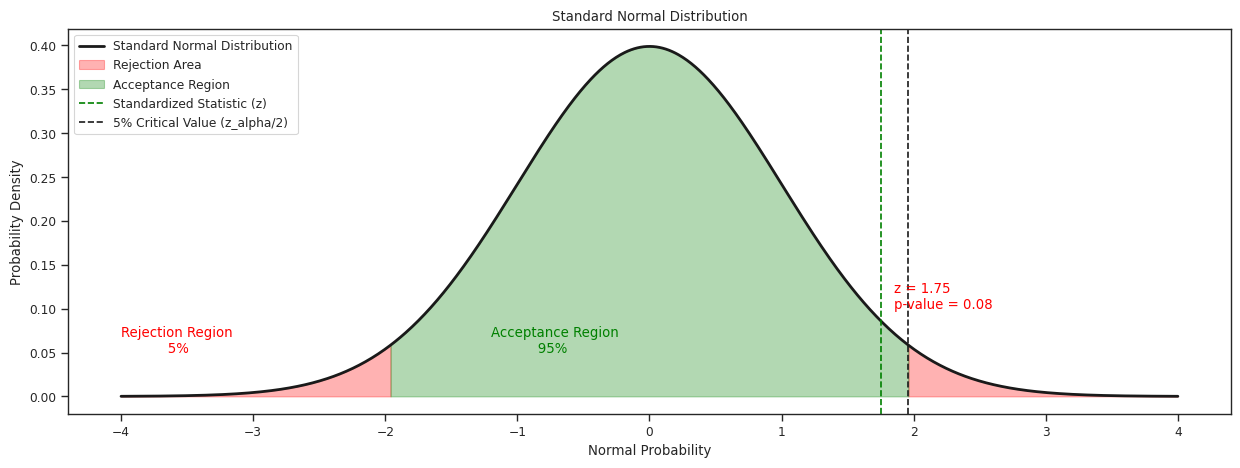

In [26]:
if abs(z) < z_alpha:
    print('\nSince, abs(z) < z_alpha/2, the equal dispersion hypothesis cannot be rejected!')
    z_line_color = 'green'
else:
    print('\nSince, abs(z) > z_alpha/2, the equal dispersion hypothesis has to be rejected!')     
    z_line_color = 'green'

# Generate x values for the normal distribution plot
x = np.linspace(-4, 4, 1000)

# Calculate the y values for the normal distribution plot
y = norm.pdf(x, 0, 1)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the normal distribution curve
ax.plot(x, y, 'k-', linewidth=2, label='Standard Normal Distribution')

# Shade the area corresponding to the right rejection region
x_fill_r = np.linspace(z_alpha, 4, 100)
y_fill_r = norm.pdf(x_fill_r, 0, 1)
ax.fill_between(x_fill_r, y_fill_r, color='red', alpha=0.3, label='Rejection Area')

# Shade the area corresponding to the left rejection region
x_fill_l = np.linspace(-4,-z_alpha, 100)
y_fill_l = norm.pdf(x_fill_l, 0, 1)
ax.fill_between(x_fill_l, y_fill_l, color='red', alpha=0.3)

# Shade the area corresponding to the acceptance region
x_fill_critical = np.linspace(-z_alpha, z_alpha, 100)
y_fill_critical = norm.pdf(x_fill_critical, 0, 1)
ax.fill_between(x_fill_critical, y_fill_critical, color='green', alpha=0.3, label='Acceptance Region')

# Plot the vertical lines for the standardized statistic and critical value
ax.axvline(x=abs(z), color=z_line_color, linestyle='--', label='Standardized Statistic (z)')
ax.axvline(x=z_alpha, color='k', linestyle='--', label='5% Critical Value (z_alpha/2)')

# Set labels and title
ax.set_xlabel('Normal Probability')
ax.set_ylabel('Probability Density')
ax.set_title('Standard Normal Distribution')

# Add legends
ax.legend(loc = 2)

# Add annotations for p-value and critical region
ax.annotate(f'z = {abs(z.round(2))}\np-value = {pval.round(2)}', xy=(abs(z) + 0.1, 0.1), color='red')
ax.annotate(f'Acceptance Region\n           95%', xy=(-1.2, 0.05), color='green')
ax.annotate(f'Rejection Region\n           5%', xy=(-4, 0.05), color='red')

# Show the plot
plt.show()

### Thus, the scientist decides to accepts the null hypothesis,

* $H_0$ : The variability of snow height **does not** vary between Period 1 and Period 2 $\rightarrow \sigma_x = \sigma_y \rightarrow$ data is **exchangeable** 
